In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('paper')
sns.set_palette('colorblind')


In [13]:
def payoff(x, x0, n):
    a = 5
    b = 3
    return (a * (x + (n-1) * x0) + b * (n-1) * x0) / n - 1/2 * x**2

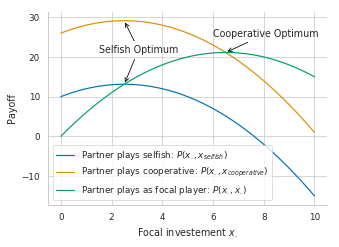

In [46]:
x = np.linspace(0, 10, 1000)
sns.set_style('whitegrid')
sns.set_context('paper')
plt.figure(figsize=(5, 5/1.41))
plt.plot(x, payoff(x, 2.5, 2), label="Partner plays selfish: $P(x_., x_{selfish})$")
plt.plot(x, payoff(x, 6.5, 2), label="Partner plays cooperative: $P(x_., x_{cooperative})$")

plt.plot(x, payoff(x, x, 2), label="Partner plays as focal player: $P(x_., x_.)$")
plt.annotate("Selfish Optimum", (2.5, payoff(2.5, 2.5, 2)), (1.5, 21), arrowprops=dict(edgecolor='black', arrowstyle="->"))
plt.annotate("Selfish Optimum", (2.5, payoff(2.5, 6.5, 2)), (1.5, 21), alpha=0, arrowprops=dict(edgecolor='black', arrowstyle="->"))
plt.annotate("Cooperative Optimum", (6.5, payoff(6.5, 6.5, 2)), (6, 25), arrowprops=dict(edgecolor='black', arrowstyle="->"))

plt.legend()
plt.ylabel('Payoff')
plt.xlabel('Focal investement $x_.$')
sns.despine()
#plt.title("Different Payoff functions according to partner's investment")
plt.savefig('Results/payoff.pdf')